In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [12]:
from load_mnist_1 import *


In [13]:
print("loaded data set from mnist_1 method")
print("introduce regulisation")
# https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/


loaded data set from mnist_1 method
introduce regulisation


In [14]:
train_images, train_labels = load_images_train()
train_labels_str = image_class_to_str(train_labels)

test_images, test_labels = load_images_test()
test_lables_str = image_class_to_str(test_labels)


In [15]:

# https://betweenandbetwixt.com/2019/01/04/convolutional-neural-network-with-keras-mnist/
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam, SGD, Adadelta


from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from keras.models import Sequential

from keras.utils import to_categorical


In [16]:
from keras.regularizers import l2

In [17]:

# keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

model = Sequential()
model.add(
    Conv2D(
        filters=8, 
        kernel_size=3, 
        padding="same", 
        input_shape=(28,28,1), 
        kernel_initializer='he_normal',
        data_format="channels_last"))

model.add(Activation("relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same",  kernel_initializer='he_normal', activation="relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same", kernel_initializer='he_normal', activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, padding="same", kernel_initializer='he_normal', activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", kernel_initializer='he_normal', activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding="same", kernel_initializer='he_normal', activation="relu"))

model.add(Flatten()) # Stretching out for our FC layer
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
		
model.add(Dense(10,activation='softmax'))




# print the cnn arch
model.summary()

model.compile(loss="categorical_crossentropy",
            optimizer=Adadelta(),
            metrics=["accuracy"])
# Test accuracy: 0.9157 5 epoch
# Test accuracy: 0.918 10 epoch


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
__________

In [18]:
# reshape inputs 
no_images_train = len(train_images)
no_images_test = len(test_images)


train_images_reshape = train_images.reshape(no_images_train, 28,28,1)
test_images_reshape = test_images.reshape(no_images_test, 28,28,1)



train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)
print(train_labels[10])
print(train_labels_cat[10])

print(train_labels[5])
print(train_labels_cat[5])

train_images_reshape = train_images_reshape / 255
test_images_reshape = test_images_reshape / 255

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
history = model.fit(
    train_images_reshape, 
    train_labels_cat, 
    epochs=20,
    batch_size=128,
    validation_data=(test_images_reshape, test_labels_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/step - loss: 1.4565 - acc: 0.7774 - val_loss: 0.6472 - val_acc: 0.8554
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.5155 - acc: 0.8704 - val_loss: 0.5263 - val_acc: 0.8489
Epoch 3/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.3953 - acc: 0.8884 - val_loss: 0.3732 - val_acc: 0.8933
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.3454 - acc: 0.9004 - val_loss: 0.3457 - val_acc: 0.8976
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.3179 - acc: 0.9079 - val_loss: 0.3543 - val_acc: 0.8971
Epoch 6/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2934 - acc: 0.9134 - val_loss: 0.3120 - val_acc: 0.9087
Epoch 7/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2737 - acc: 0.9204 - val_loss: 0.3209 - 

In [20]:
# We can get our score
score = model.evaluate(test_images_reshape, test_labels_cat, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.30199551472663877
Test accuracy: 0.9184


dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


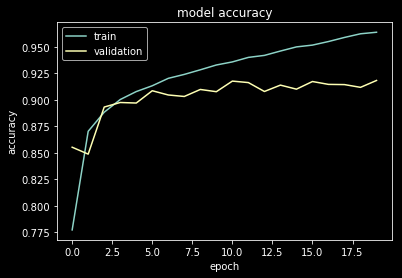

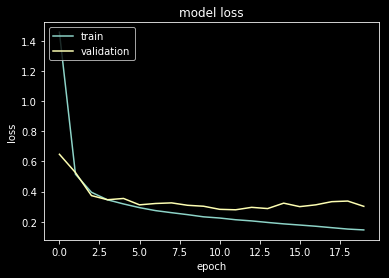

In [21]:
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [23]:
print(" this is significant improvement over the previous attempt which only had reguliation")


 this is significant improvement over the previous attempt which only had reguliation


In [24]:
"in this case we added kernel_initislisation to use he_normal"
" we can see that the val loss dropped further and val accuracy improved. "
" we also notice that after almost the 15th epoch val_loss and val_accuracy started to bounce around, which may indicate that it keeps diverging from the optmim minimum. so probably implementing some learning decay should help it find the optimal minima" 


' we also notice that after almost the 15th epoch val_loss and val_accuracy started to bounce around, which may indicate that it keeps diverging from the optmim minimum. so probably implementing some learning decay should help it find the optimal minima'